# DSCI 525 - Web and Cloud Computing

## Group 14
- Dhruvi Nishar
- Eyre Hong
- Flora  Ouedraogo
- Manvir Kohli

## Introduction 

- **(finish later)**

- Our repo can be found on Github: https://github.com/UBC-MDS/525_group_14


In [1]:
# Importing packages for analysis
import re
import os
import glob
import zipfile
import requests
from urllib.request import urlretrieve
import json
import pandas as pd

### 1. Downloading the data 

##### Question

rubric={correctness:10}

1. Download the data from [figshare](https://figshare.com/articles/dataset/Daily_rainfall_over_NSW_Australia/14096681) to your local computer using the [figshare API](https://docs.figshare.com) (you need to make use of `requests` library).

2. Extract the zip file, again programmatically, similar to how we did it in class. 

>  You can download the data and unzip it manually. But we learned about APIs, so we can do it in a reproducible way with the `requests` library, similar to how we [did it in class](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture1.html#using-rest-api-lab-lecture).

> There are 5 files in the figshare repo. The one we want is: `data.zip`


##### Answer

- The downloaded data will be stored in the below location on the local system of one of the team group members

In [2]:
%cd C:/Users/Manvir/OneDrive - UBC/UBC MDS/22.DSCI_525_web-cloud-comp_students/525_group_14

C:\Users\Manvir\OneDrive - UBC\UBC MDS\22.DSCI_525_web-cloud-comp_students\525_group_14


In [3]:
article_id = 14096681
url = f"https://api.figshare.com/v2/articles/{article_id}"
headers = {"Content-Type": "application/json"}
output_directory = "rainfall_data/"

In [4]:
response = requests.request("GET", url, headers=headers)
data = json.loads(response.text)  
files = data["files"]          
files

[{'id': 26579150,
  'name': 'daily_rainfall_2014.png',
  'size': 58863,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579150',
  'supplied_md5': 'fd32a2ffde300a31f8d63b1825d47e5e',
  'computed_md5': 'fd32a2ffde300a31f8d63b1825d47e5e'},
 {'id': 26579171,
  'name': 'environment.yml',
  'size': 192,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26579171',
  'supplied_md5': '060b2020017eed93a1ee7dd8c65b2f34',
  'computed_md5': '060b2020017eed93a1ee7dd8c65b2f34'},
 {'id': 26586554,
  'name': 'README.md',
  'size': 5422,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26586554',
  'supplied_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c',
  'computed_md5': '61858c6cc0e6a6d6663a7e4c75bbd88c'},
 {'id': 26766812,
  'name': 'data.zip',
  'size': 814041183,
  'is_link_only': False,
  'download_url': 'https://ndownloader.figshare.com/files/26766812',
  'supplied_md5': 'b517383f76e77bd03755a63a8f

In [5]:
%%time
files_to_dl = ["data.zip"]  # feel free to add other files here
for file in files:
    if file["name"] in files_to_dl:
        os.makedirs(output_directory, exist_ok=True)
        urlretrieve(file["download_url"], output_directory + file["name"])

CPU times: total: 6.84 s
Wall time: 1min 45s


In [6]:
## extracting the zip fall to the output directory
with zipfile.ZipFile(os.path.join(output_directory, "data.zip"), 'r') as f:
    f.extractall(output_directory)

In [7]:
# %ls -ltr rainfall_data

### 2. Combining data CSVs
#### Question

rubric={correctness:10,reasoning:10}
1. Combine data CSVs into a single CSV using pandas.
    
2. When combining the CSV files, add an extra column called "model" that identifies the model.
    Tip 1: you can get this column populated from the file name, eg: for file name "SAM0-UNICON_daily_rainfall_NSW.csv", the model name is SAM0-UNICON
    Tip 2: Remember how we added "year" column when we combined airline CSVs. Here the regex will be to get word before an underscore ie, "/([^_]*)"

> Note: There is a file called `observed_daily_rainfall_SYD.csv` in the data folder that you downloaded. Make sure you exclude this file (programmatically or just take out that file from the folder) before you combine CSVs. We will use this file in our next milestone.

3. ***Compare*** run times on different machines within your team and summarize your observations. 

> Warning: Some of you might not be able to do it on your laptop. It's fine if you're unable to do it. Just make sure you discuss the reasons why you might not have been able to run this on your laptop. 

#### Answer

- Below we combine all the differnt CSVs into a single csv after excluding `observed_daily_rainfall_SYD.csv`. 
- Results Comparison

| Team Member | Operating System | RAM | Processor | Is SSD | Time taken |
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|
| Manvir    | Windows 11| 16 gb    | Intel i7 11th Gen           | True        | 10m 46s           |
| Flora   |        OSX 12.6          |  8GB   |      Yes     |     3min 37s   |            |
| Member 3    |                  |     |           |        |            |
| Member 4    |                  |     |           |        |            |

In [8]:
%%time

## combining the data after moving the `observed_daily_rainfall_SYD.csv` file out of the folder


# df = pd.DataFrame()
files = os.listdir('rainfall_data')
files = [file for file in files if ".csv" in file]

if "combined_data.csv" in files:
    print("removing old combined file")
    os.remove("rainfall_data\\combined_data.csv")
    files.remove("combined_data.csv")

if "observed_daily_rainfall_SYD.csv" in files:
    print("moving observed_daily_rainfall_SYD.csv")
    os.replace("rainfall_data\\observed_daily_rainfall_SYD.csv",
               "C:\\Users\\Manvir\\OneDrive - UBC\\UBC MDS\\22.DSCI_525_web-cloud-comp_students\\525_group_14\\observed_daily_rainfall_SYD.csv")
    files.remove("observed_daily_rainfall_SYD.csv")
    
df = pd.concat((pd.read_csv(f'rainfall_data\\{file}', index_col=0)
                .assign(model=file.split("_")[0])
                for file in files)
              )
df.to_csv("rainfall_data/combined_data.csv")

moving observed_daily_rainfall_SYD.csv
CPU times: total: 10min 18s
Wall time: 10min 46s


### 3. Load the combined CSV to memory and perform a simple EDA
#### Question
rubric={correctness:10,reasoning:10}

1. Investigate at least two of the following approaches to reduce memory usage while performing the EDA (e.g., value_counts). Refer to lecture notes [here](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture1.html#some-tactics-to-deal-with-memory-issue).
    - Changing `dtype` of your data
    - Load just columns that we want
    - Loading in chunks
    
2. ***Compare*** run times on different machines within your team and summarize your observations.

#### Answer 
- In order to try to reduce memory usage we decided to try the following approaches- 
     - Read the data in chunks
     - Use only the columns that we needed (time, rain, model)
     - Convert the data type of certain columns (time -> from object to datetime and
     rain from float64 to float32)
     - Combination of all 3
- Results Comparison

| Team Member | Operating System | RAM | Processor | Is SSD |Time taken to load required cols only| Time taken after changing data types|Time taken to load entire data by chunks |Time taken based on all 3 approaches combined|
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|:----------:|:----------:| :----------:|
| Manvir    | Windows 11| 16 gb    | Intel i7 11th Gen           | True        |1m 26s            |  4m 9s          |     1m 44s       |    3m 7s         |
| Member 2    |                  |     |           |        |            |            |            |             |
| Member 3    |                  |     |           |        |            |            |            |             |
| Member 4    |                  |     |           |        |            |            |            |             |


##### 1. Reading only the necessary columns

In [9]:
%%time
use_cols = ['time','rain (mm/day)','model']
df = pd.read_csv("rainfall_data/combined_data.csv",usecols=use_cols)
print(df["model"].value_counts())

MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 1min 18s
Wall time: 1min 26s


##### 2. Changing Data Types

In [10]:
%%time
df = pd.read_csv("rainfall_data/combined_data.csv")
print(f"Memory usage with rain as float64 and time as object: {df.memory_usage().sum() / 1e6:.2f} MB")
df['rain (mm/day)'] = df['rain (mm/day)'].astype('float32')
df['time'] = pd.to_datetime(df['time']).dt.date
print(f"Memory usage with rain as float32 and time as datetime object: {df.memory_usage().sum() / 1e6:.2f} MB")
print(df["model"].value_counts())

Memory usage with rain as float64 and time as object: 3498.20 MB
Memory usage with rain as float32 and time as datetime object: 3248.33 MB
MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 3min 23s
Wall time: 4min 9s


##### 3. Reading data in chunks

In [11]:
%%time
counts = pd.Series(dtype=int)
for chunk in pd.read_csv("rainfall_data/combined_data.csv", chunksize=10_000_000):
    counts = counts.add(chunk["model"].value_counts(), fill_value=0)
print(counts.astype(int))

ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
AWI-ESM-1-1-LR       966420
BCC-CSM2-MR         3035340
BCC-ESM1             551880
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
CanESM5              551880
EC-Earth3-Veg-LR    3037320
FGOALS-f3-L         3219300
FGOALS-g3           1287720
GFDL-CM4            3219300
GFDL-ESM4           3219300
INM-CM4-8           1609650
INM-CM5-0           1609650
KIOST-ESM           1287720
MIROC6              2070900
MPI-ESM-1-2-HAM      966420
MPI-ESM1-2-HR       5154240
MPI-ESM1-2-LR        966420
MRI-ESM2-0          3037320
NESM3                966420
NorESM2-LM           919800
NorESM2-MM          3541230
SAM0-UNICON         3541153
TaiESM1             3541230
dtype: int32
CPU times: total: 1min 38s
Wall time: 1min 44s


##### 4. Combining all the 3 approaches above -

In [12]:
%%time

use_cols = ['time','rain (mm/day)','model']

# df = pd.DataFrame()              
chunks = []

for chunk in pd.read_csv("rainfall_data/combined_data.csv", chunksize=10_000_000,usecols = use_cols):
    chunks.append(chunk)

df = pd.concat(chunks)

print(f"Memory usage with rain as float64 and time as object: {df.memory_usage().sum() / 1e6:.2f} MB")
df['rain (mm/day)'] = df['rain (mm/day)'].astype('float32')
df['time'] = pd.to_datetime(df['time']).dt.date
print(f"Memory usage with rain as float32 and time as datetime object: {df.memory_usage().sum() / 1e6:.2f} MB")
print(df['model'].value_counts())

Memory usage with rain as float64 and time as object: 1499.23 MB
Memory usage with rain as float32 and time as datetime object: 1249.36 MB
MPI-ESM1-2-HR       5154240
TaiESM1             3541230
NorESM2-MM          3541230
CMCC-CM2-HR4        3541230
CMCC-CM2-SR5        3541230
CMCC-ESM2           3541230
SAM0-UNICON         3541153
FGOALS-f3-L         3219300
GFDL-CM4            3219300
GFDL-ESM4           3219300
EC-Earth3-Veg-LR    3037320
MRI-ESM2-0          3037320
BCC-CSM2-MR         3035340
MIROC6              2070900
ACCESS-CM2          1932840
ACCESS-ESM1-5       1610700
INM-CM5-0           1609650
INM-CM4-8           1609650
KIOST-ESM           1287720
FGOALS-g3           1287720
MPI-ESM1-2-LR        966420
NESM3                966420
AWI-ESM-1-1-LR       966420
MPI-ESM-1-2-HAM      966420
NorESM2-LM           919800
BCC-ESM1             551880
CanESM5              551880
Name: model, dtype: int64
CPU times: total: 2min 58s
Wall time: 3min 7s


#### Overall Results Comparison Summary



| Team Member | Operating System | RAM | Processor | Is SSD | Time taken to combine CSVs|Time taken to load required cols only| Time taken after changing data types|Time taken to load entire data by chunks |Time taken based on all 3 approaches combined|
|:-----------:|:----------------:|:---:|:---------:|:------:|:----------:|:----------:|:----------:| :----------:|:----------:|
| Manvir    | Windows 11| 16 gb    | Intel i7 11th Gen           | True        |        10m 46s    |1m 26s            |  4m 9s          |          1m 44s  |        3m 7s     |
| Member 2    |                  |     |           |        |            |            |            |             |            |
| Member 3    |                  |     |           |        |            |            |            |             |            |
| Member 4    |                  |     |           |        |            |            |            |             |            |


### 4. Perform a simple EDA in R
rubric={correctness:15,reasoning:10}

#### Question

1. Choose one of the methods listed below for transferring the dataframe (i.e., the entire dataset) from Python to R, and explain why you opted for this approach instead of the others.
    - [Parquet file](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture2.html#converting-csv-parquet)
    - [Pandas exchange](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture1.html#use-r-and-python-interchangeably)
    - [Arrow exchange](https://pages.github.ubc.ca/MDS-2022-23/DSCI_525_web-cloud-comp_students/lectures/lecture2.html#use-r-and-python-interchangeably-with-arrow)
2. Once you have the dataframe in R, perform a simple EDA.

#### Answer 
- In order to transfer the dataframe to R we chose the `arrow exchange` because **EXPLAIN** 

##### Transferring data from python to R

In [13]:
# !pip install rpy2_arrow
import pyarrow.dataset as ds
import pyarrow as pa
import pandas as pd
import pyarrow 
from pyarrow import csv
import rpy2_arrow.pyarrow_rarrow as pyra

In [14]:
%load_ext rpy2.ipython

C:\Users\Manvir\miniconda3\envs\525_2023\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [15]:
%%time
csv_data = ds.dataset('rainfall_data/combined_data.csv', format="csv")
# Converting the `pyarrow dataset` to a `pyarrow table`
table = csv_data.to_table()
# Converting a `pyarrow table` to a `rarrow table`
r_table = pyra.converter.py2rpy(table)

CPU times: total: 58.1 s
Wall time: 58.7 s


##### EDA in R

In [16]:
%%R
# install.packages('dplyr')
# install.packages('ggplot2')
# install.packages('forcats')
library(dplyr)
library(ggplot2)

R[write to console]: 
Attaching package: 'dplyr'


R[write to console]: The following objects are masked from 'package:stats':

    filter, lag


R[write to console]: The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


R[write to console]: RStudio Community is a great place to get help:
https://community.rstudio.com/c/tidyverse



In [17]:
%%R -i r_table
glimpse(r_table)

Table
62,467,843 rows x 7 columns
$ time      <timestamp[s]> 1889-01-01 04:00:00, 1889-01-02 04:00:00, 1889-01-03 ~
$ lat_min         <double> -36.25, -36.25, -36.25, -36.25, -36.25, -36.25, -36.2~
$ lat_max         <double> -35, -35, -35, -35, -35, -35, -35, -35, -35, -35, -35~
$ lon_min         <double> 140.625, 140.625, 140.625, 140.625, 140.625, 140.625,~
$ lon_max         <double> 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.5, 142.~
$ `rain (mm/day)` <double> 3.293256e-13, 0.000000e+00, 0.000000e+00, 0.000000e+0~
$ model           <string> "ACCESS-CM2", "ACCESS-CM2", "ACCESS-CM2", "ACCESS-CM2~


In [18]:
%%R
r_df <- as.data.frame(r_table)

print(r_df |> count(model),n=30)

# A tibble: 27 x 2
   model                  n
   <chr>              <int>
 1 ACCESS-CM2       1932840
 2 ACCESS-ESM1-5    1610700
 3 AWI-ESM-1-1-LR    966420
 4 BCC-CSM2-MR      3035340
 5 BCC-ESM1          551880
 6 CanESM5           551880
 7 CMCC-CM2-HR4     3541230
 8 CMCC-CM2-SR5     3541230
 9 CMCC-ESM2        3541230
10 EC-Earth3-Veg-LR 3037320
11 FGOALS-f3-L      3219300
12 FGOALS-g3        1287720
13 GFDL-CM4         3219300
14 GFDL-ESM4        3219300
15 INM-CM4-8        1609650
16 INM-CM5-0        1609650
17 KIOST-ESM        1287720
18 MIROC6           2070900
19 MPI-ESM-1-2-HAM   966420
20 MPI-ESM1-2-HR    5154240
21 MPI-ESM1-2-LR     966420
22 MRI-ESM2-0       3037320
23 NESM3             966420
24 NorESM2-LM        919800
25 NorESM2-MM       3541230
26 SAM0-UNICON      3541153
27 TaiESM1          3541230


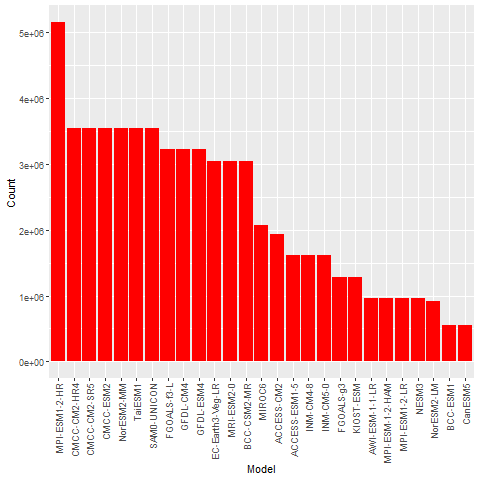

In [19]:
%%R
r_df |> ggplot(aes(x = forcats::fct_infreq(model))) + geom_bar(fill = 'red') + 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) +
labs(x = 'Model',y='Count')    

---